# Bike Rental

I explore the assigned dataset used in the prefered dataset recommended by Udacity:
https://www.lyft.com/bikes/bay-wheels/system-data.

This data set is about Bike rental usage with user profiles mponthly. 

The data set I studied includes the complete recent 9 months from 2019 to 2020 from August of 2019 to April of 2020. 

The row represent the trip is itemized and listed which includes:  
duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip

Many information can be obtained from this. I have explored and obtained the results in this trip data set as below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Object

In [2]:
# Monthly bike rental or bay wheels rental as specified by Lyft
bike_rental_mon1 = pd.read_csv('./201908-baywheels-tripdata.csv')
bike_rental_mon2 = pd.read_csv('./201909-baywheels-tripdata.csv')
bike_rental_mon3 = pd.read_csv('./201910-baywheels-tripdata.csv')
bike_rental_mon4 = pd.read_csv('./201911-baywheels-tripdata.csv')
bike_rental_mon5 = pd.read_csv('./201912-baywheels-tripdata.csv')
bike_rental_mon6 = pd.read_csv('./202001-baywheels-tripdata.csv')
bike_rental_mon7 = pd.read_csv('./202002-baywheels-tripdata.csv')
bike_rental_mon8 = pd.read_csv('./202003-baywheels-tripdata.csv')
bike_rental_mon9 = pd.read_csv('./202004-baywheels-tripdata.csv') 

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Inspection

In [3]:
bike_rental_mon1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,68145,2019-08-31 21:27:42.2530,2019-09-01 16:23:27.4920,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,No
1,53216,2019-08-31 22:34:17.5120,2019-09-01 13:21:13.9310,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,No
2,53182,2019-08-31 22:34:49.9420,2019-09-01 13:21:12.4570,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,No
3,75682,2019-08-31 14:22:02.2780,2019-09-01 11:23:24.5110,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,No
4,30849,2019-08-31 18:47:08.0570,2019-09-01 03:21:17.6970,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,No


This data frame has many features as specified by the first row.

# Data Summation

#### Concatenate monthly dataframes into a 9-months dataframe

In [4]:
bike_rental = pd.concat([bike_rental_mon1, bike_rental_mon2, bike_rental_mon3, bike_rental_mon4, bike_rental_mon5, bike_rental_mon6,
                         bike_rental_mon7, bike_rental_mon8, bike_rental_mon9])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


# Data Cleaning

In [5]:
bike_rental.reset_index(drop=True, inplace=True)
bike_rental.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,...,rideable_type,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
0,3112.0,No,68145.0,NaN,NaN,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2019-09-01 16:23:27.4920,...,NaN,NaN,NaN,249.0,37.858473,-122.253253,Russell St at College Ave,2019-08-31 21:27:42.2530,NaN,Customer
1,2440.0,No,53216.0,NaN,NaN,78.0,37.773717,-122.411647,Folsom St at 9th St,2019-09-01 13:21:13.9310,...,NaN,NaN,NaN,368.0,37.785434,-122.419622,Myrtle St at Polk St,2019-08-31 22:34:17.5120,NaN,Customer
2,9743.0,No,53182.0,NaN,NaN,78.0,37.773717,-122.411647,Folsom St at 9th St,2019-09-01 13:21:12.4570,...,NaN,NaN,NaN,368.0,37.785434,-122.419622,Myrtle St at Polk St,2019-08-31 22:34:49.9420,NaN,Customer
3,11418.0,No,75682.0,NaN,NaN,126.0,37.761634,-122.390648,Esprit Park,2019-09-01 11:23:24.5110,...,NaN,NaN,NaN,104.0,37.767045,-122.390833,4th St at 16th St,2019-08-31 14:22:02.2780,NaN,Subscriber
4,1553.0,No,30849.0,NaN,NaN,327.0,37.332039,-121.881766,5th St at San Salvador St,2019-09-01 03:21:17.6970,...,NaN,NaN,NaN,327.0,37.332039,-121.881766,5th St at San Salvador St,2019-08-31 18:47:08.0570,NaN,Customer


In [6]:
print(bike_rental.shape)
print(bike_rental.dtypes)

(1993308, 24)
bike_id                    float64
bike_share_for_all_trip     object
duration_sec               float64
end_lat                    float64
end_lng                    float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
ended_at                    object
member_casual               object
rental_access_method        object
ride_id                     object
rideable_type               object
start_lat                  float64
start_lng                  float64
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
started_at                  object
user_type                   object
dtype: object


# Data Correction

In [7]:
bike_rental[bike_rental.duplicated()]

,bike_id,bike_share_for_all_trip,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,...,rideable_type,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
1794868,967152.0,NaN,184.0,NaN,NaN,NaN,37.294455,-121.852412,NaN,2020-03-01 16:02:12,...,NaN,NaN,NaN,NaN,37.291022,-121.849144,NaN,2020-03-01 15:59:07,NaN,Customer
1794873,967152.0,NaN,167.0,NaN,NaN,NaN,37.294452,-121.852453,NaN,2020-03-01 21:05:58,...,NaN,NaN,NaN,NaN,37.291145,-121.849215,NaN,2020-03-01 21:03:10,NaN,Customer
1794896,809335.0,NaN,515.0,NaN,NaN,NaN,37.305733,-121.898976,NaN,2020-03-01 16:26:40,...,NaN,NaN,NaN,NaN,37.293233,-121.881765,NaN,2020-03-01 16:18:04,NaN,Customer
1794907,967152.0,NaN,222.0,NaN,NaN,NaN,37.291026,-121.849131,NaN,2020-03-01 12:54:56,...,NaN,NaN,NaN,NaN,37.293674,-121.851900,NaN,2020-03-01 12:51:13,NaN,Customer
1794941,967152.0,NaN,197.0,NaN,NaN,NaN,37.291145,-121.849184,NaN,2020-03-01 16:50:03,...,NaN,NaN,NaN,NaN,37.294480,-121.852444,NaN,2020-03-01 16:46:45,NaN,Customer
1794948,435830.0,NaN,1115.0,NaN,NaN,NaN,37.322121,-121.828247,NaN,2020-03-01 16:03:43,...,NaN,NaN,NaN,NaN,37.294565,-121.876272,NaN,2020-03-01 15:45:08,NaN,Customer
1794954,791001.0,NaN,3175.0,NaN,NaN,NaN,37.280917,-121.950277,NaN,2020-03-01 20:40:42,...,NaN,NaN,NaN,NaN,37.294710,-121.932079,NaN,2020-03-01 19:47:47,NaN,Subscriber
1794974,692895.0,NaN,1418.0,NaN,NaN,NaN,37.304575,-121.894081,NaN,2020-03-01 16:03:36,...,NaN,NaN,NaN,NaN,37.295171,-121.885634,NaN,2020-03-01 15:39:57,NaN,Subscriber
1794999,622027.0,NaN,822.0,NaN,NaN,NaN,37.322071,-121.881226,NaN,2020-03-01 09:45:23,...,NaN,NaN,NaN,NaN,37.296794,-121.879718,NaN,2020-03-01 09:31:40,NaN,Subscriber
1795000,151897.0,NaN,1110.0,NaN,NaN,NaN,37.310912,-121.895277,NaN,2020-03-01 15:38:23,...,NaN,NaN,NaN,NaN,37.296809,-121.879752,NaN,2020-03-01 15:19:52,NaN,Customer


# Data Structure

In [8]:
bike_rental.dtypes

bike_id                    float64
bike_share_for_all_trip     object
duration_sec               float64
end_lat                    float64
end_lng                    float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
ended_at                    object
member_casual               object
rental_access_method        object
ride_id                     object
rideable_type               object
start_lat                  float64
start_lng                  float64
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
started_at                  object
user_type                   object
dtype: object

# Parameter Observation

In [9]:
bike_rental.describe()

,bike_id,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude
count,1.909049e+06,1.909049e+06,84117.000000,84117.000000,1.452806e+06,1.909049e+06,1.909049e+06,84259.000000,84259.000000,1.454239e+06,1.909049e+06,1.909049e+06
mean,1.749603e+05,8.148029e+02,37.706943,-122.318775,1.580482e+02,3.775403e+01,-1.223472e+02,37.707087,-122.318657,1.647915e+02,3.775514e+01,-1.223520e+02
std,2.736629e+05,1.910791e+03,0.168726,0.199946,1.367913e+02,2.961676e-01,8.967241e-01,0.168721,0.199837,1.379703e+02,1.998651e-01,5.499392e-01
min,4.000000e+00,6.000000e+01,37.221500,-122.513900,3.000000e+00,0.000000e+00,-1.225758e+02,37.266500,-122.513200,3.000000e+00,0.000000e+00,-1.225142e+02
25%,3.661000e+03,3.720000e+02,37.756700,-122.426900,4.300000e+01,3.776704e+01,-1.224159e+02,37.756600,-122.427200,5.200000e+01,3.776704e+01,-1.224176e+02
50%,1.139900e+04,5.920000e+02,37.773500,-122.408400,1.100000e+02,3.777865e+01,-1.224008e+02,37.773500,-122.408400,1.160000e+02,3.777793e+01,-1.224009e+02
75%,3.221240e+05,9.200000e+02,37.787400,-122.287600,2.520000e+02,3.779413e+01,-1.223904e+02,37.787400,-122.285600,2.590000e+02,3.779274e+01,-1.223904e+02
max,9.999600e+05,9.121100e+05,37.880200,-121.774300,5.210000e+02,4.551000e+01,0.000000e+00,37.880200,-121.806400,5.210000e+02,4.551000e+01,0.000000e+00


### Have the main findings from the exploration been documented??

The main finding from the exploration is on the distribution and relationship between the key variable related to trip data. 

I believe different clusters of users will have different clusters of trip usage. 

Additionally, the exploration below will showcase the key insights that are conveyed by the explanatory presentation.

In [10]:
len(bike_rental.bike_id)

1993308

There are 1993308 records of bike rentals.

### Does the presentation clearly convey key insights?

A slideshow is provided, with at least three visualizations used in the presentation to convey key insights that the bike trip will be highly related with location and user. 

Therefore we can see different location and different user will be associated into different clusters which share similar characteristics. 

These key insights match those documented in the summary. Each visualization is associated with comments that accurately depict their purpose as related to bike trip data.

# Visualization

#### With histogram plot of  duration_sec 

Duration of the trip is important because we can see if the bike rental business is still useful in the recent year. If more people use the bike, it means people find the bike is useful and therefore Lyft can promote the bike business more. However, if less people use the bike, it means people find the bike is not useful and therefore Lfyt can demote the bike business as soon as possible.

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


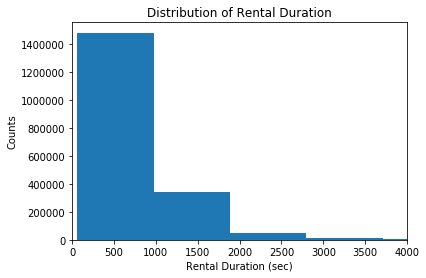

In [11]:
# plot histogram of duration_sec
base_color = sns.color_palette()[0]
plt.hist(data=bike_rental, x='duration_sec', color=base_color, bins=1000)
plt.xlim(0, 4000)
plt.title('Distribution of Rental Duration')
plt.xlabel('Rental Duration (sec)')
plt.ylabel('Counts');

We can observe that many people who spend under 1000 seconds for bike rentals. We can apply apply log transform as this distribution plot show a highly right skewed distribution.

#### log transformation on duration_sec histogram

In [12]:
np.log10(bike_rental.duration_sec.describe())

count    6.280817
mean     2.911053
std      3.281213
min      1.778151
25%      2.570543
50%      2.772322
75%      2.963788
max      5.960047
Name: duration_sec, dtype: float64

#### histogram plot with log transformation on duration_sec

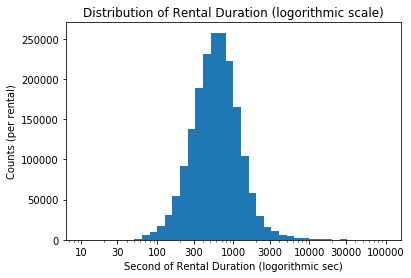

In [13]:
log_duration_bins = 10 ** np.arange(1, 5.0+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data=bike_rental, x='duration_sec', bins=log_duration_bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Distribution of Rental Duration (logorithmic scale)')
plt.xlabel('Second of Rental Duration (logorithmic sec)')
plt.ylabel('Counts (per rental)');

We arrive a nice normal distribution.

Additionally, we obtain a mean at about 800 second at log scale for the bike rental usage.

#### countplot of user_type

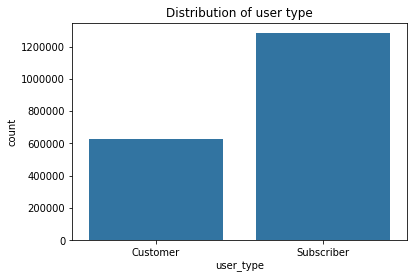

In [14]:
sns.countplot(data=bike_rental, x='user_type', color=base_color);
plt.title('Distribution of user type');

We see that subscriber will rent the bike more.

Additionally, we can see the amount of subscriber is likely to rent the bike twice than the amount of customer who rent the bike once.

# histogram of duration_sec < 300 sec

## Outliner Studies (Riding bike for tiny little trip)

In [15]:
bike_rental_cut_duration_outliers = bike_rental.query('duration_sec < 300')
bike_rental_cut_duration_outliers.reset_index(drop=True, inplace=True)
bike_rental_cut_duration_outliers

,bike_id,bike_share_for_all_trip,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,...,rideable_type,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,started_at,user_type
0,10019.0,No,219.0,NaN,NaN,223.0,37.764765,-122.420091,16th St Mission BART Station 2,2019-09-01 00:03:22.9180,...,NaN,NaN,NaN,356.0,37.769188,-122.422285,Valencia St at Clinton Park,2019-08-31 23:59:43.3910,NaN,Subscriber
1,9960.0,No,265.0,NaN,NaN,36.0,37.783830,-122.398870,Folsom St at 3rd St,2019-08-31 23:58:07.8500,...,NaN,NaN,NaN,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2019-08-31 23:53:42.1930,NaN,Subscriber
2,10508.0,No,96.0,NaN,NaN,304.0,37.348759,-121.894798,Jackson St at 5th St,2019-08-31 23:53:34.4230,...,NaN,NaN,NaN,289.0,37.351017,-121.895921,5th St at Taylor St,2019-08-31 23:51:57.9550,NaN,Subscriber
3,10026.0,No,292.0,NaN,NaN,121.0,37.759210,-122.421339,Mission Playground,2019-08-31 23:50:24.3300,...,NaN,NaN,NaN,141.0,37.747998,-122.420219,Valencia St at Cesar Chavez St,2019-08-31 23:45:32.3250,NaN,Subscriber
4,10548.0,No,185.0,NaN,NaN,417.0,37.326011,-121.912327,Park Ave at Race St,2019-08-31 23:45:05.1890,...,NaN,NaN,NaN,417.0,37.326011,-121.912327,Park Ave at Race St,2019-08-31 23:41:59.2880,NaN,Customer
5,10396.0,Yes,297.0,NaN,NaN,307.0,37.332692,-121.900084,SAP Center,2019-08-31 23:36:35.8880,...,NaN,NaN,NaN,276.0,37.332233,-121.912517,Julian St at The Alameda,2019-08-31 23:31:38.7060,NaN,Subscriber
6,10489.0,No,114.0,NaN,NaN,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2019-08-31 23:29:06.1050,...,NaN,NaN,NaN,77.0,37.773507,-122.416040,11th St at Natoma St,2019-08-31 23:27:11.7940,NaN,Subscriber
7,3339.0,Yes,236.0,NaN,NaN,166.0,37.851376,-122.252523,College Ave at Alcatraz Ave,2019-08-31 23:27:43.4750,...,NaN,NaN,NaN,171.0,37.844279,-122.251900,Rockridge BART Station,2019-08-31 23:23:46.8670,NaN,Subscriber
8,11487.0,No,114.0,NaN,NaN,133.0,37.755213,-122.420975,Valencia St at 22nd St,2019-08-31 23:18:02.3750,...,NaN,NaN,NaN,386.0,37.752105,-122.419724,24th St at Bartlett St,2019-08-31 23:16:07.5560,NaN,Subscriber
9,10386.0,Yes,229.0,NaN,NaN,34.0,37.783988,-122.412408,Father Alfred E Boeddeker Park,2019-08-31 23:08:53.6470,...,NaN,NaN,NaN,369.0,37.787349,-122.416651,Hyde St at Post St,2019-08-31 23:05:03.8410,NaN,Subscriber


# Matrix Scatterplot

Generate Matrix Scatterplot with diagonal cells show histograms of each of the variables such as bike_id, bike_share_for_all_trip and duration_sec.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


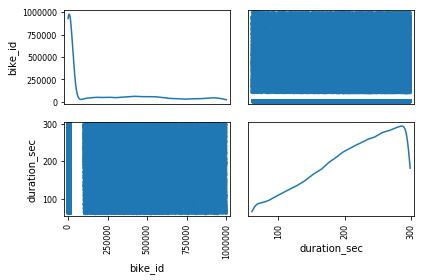

In [16]:
pd.tools.plotting.scatter_matrix(bike_rental_cut_duration_outliers.loc[:, "bike_id":"duration_sec"], diagonal="kde")
plt.tight_layout()
plt.show()

In [17]:
corrmat = bike_rental_cut_duration_outliers.corr()
corrmat

,bike_id,duration_sec,end_lat,end_lng,end_station_id,end_station_latitude,end_station_longitude,start_lat,start_lng,start_station_id,start_station_latitude,start_station_longitude
bike_id,1.000000,-0.054758,NaN,NaN,0.009265,-0.159599,0.022095,NaN,NaN,0.012078,-0.130857,0.023533
duration_sec,-0.054758,1.000000,NaN,NaN,-0.027946,0.037591,-0.011745,NaN,NaN,-0.007179,0.036974,-0.017128
end_lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_lng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_station_id,0.009265,-0.027946,NaN,NaN,1.000000,-0.090274,0.084402,NaN,NaN,0.368924,-0.155342,0.294274
end_station_latitude,-0.159599,0.037591,NaN,NaN,-0.090274,1.000000,-0.861224,NaN,NaN,-0.124722,0.328212,-0.105297
end_station_longitude,0.022095,-0.011745,NaN,NaN,0.084402,-0.861224,1.000000,NaN,NaN,0.119430,-0.115948,0.085771
start_lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_lng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_station_id,0.012078,-0.007179,NaN,NaN,0.368924,-0.124722,0.119430,NaN,NaN,1.000000,-0.081452,0.068319


# Heatmap of Outliner has duration_sec < 300 sec

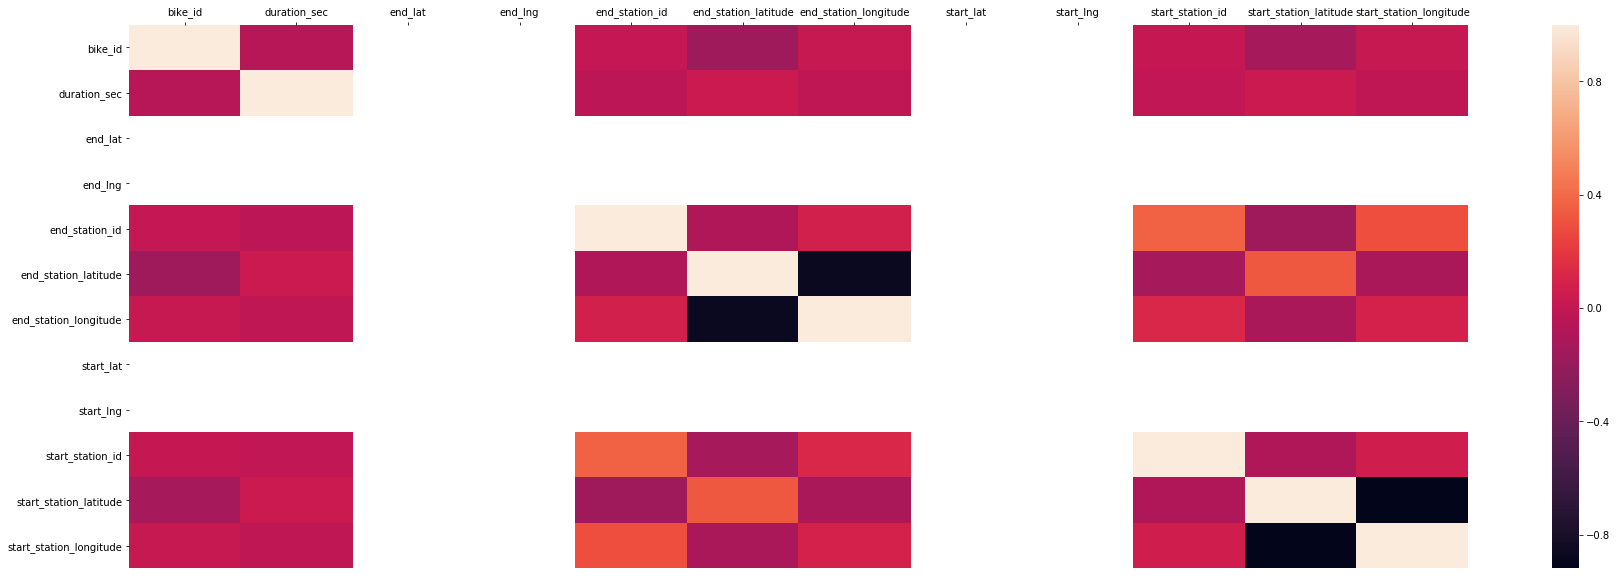

In [18]:
plt.figure(figsize=(30,10))
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

From the above, the results tell that bike id and duation, starting/end stationd id to starting/end station longitude are correlated in showing multiple of three appearent cluster groups comprise of the bike group, starting station group and ending station group.

This combination makes perfect sense, as each of this group is distinctive according to their statistical correlation significances. 

It is also interesting note the station latitude is negatively correlated with the station longitutde.

# Distribution of Bike End Station

In [19]:
bike_bins = np.arange(bike_rental_cut_duration_outliers.end_station_id.min(), bike_rental_cut_duration_outliers.	end_station_id.max(), 5)
bike_bins

array([  3.,   8.,  13.,  18.,  23.,  28.,  33.,  38.,  43.,  48.,  53.,
        58.,  63.,  68.,  73.,  78.,  83.,  88.,  93.,  98., 103., 108.,
       113., 118., 123., 128., 133., 138., 143., 148., 153., 158., 163.,
       168., 173., 178., 183., 188., 193., 198., 203., 208., 213., 218.,
       223., 228., 233., 238., 243., 248., 253., 258., 263., 268., 273.,
       278., 283., 288., 293., 298., 303., 308., 313., 318., 323., 328.,
       333., 338., 343., 348., 353., 358., 363., 368., 373., 378., 383.,
       388., 393., 398., 403., 408., 413., 418., 423., 428., 433., 438.,
       443., 448., 453., 458., 463., 468., 473., 478., 483., 488., 493.,
       498., 503., 508., 513., 518.])

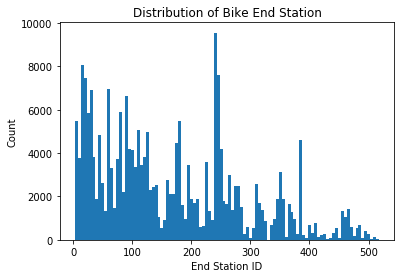

In [20]:
plt.hist(data=bike_rental_cut_duration_outliers, x='end_station_id', bins=bike_bins);
plt.title('Distribution of Bike End Station')
plt.xlabel('End Station ID')
plt.ylabel('Count');

This Distribution of Bike End Station histogram is not uniformly distributed. Therefore the visulation study creates good plot for showcasing the polairty in duration by end station.  

We observe that the end stations with the ID at about 250 or 30 have bike rentals are for tiny little trips or short durations.

#### Bar Chart of Start Station ID

In [21]:
bike_rental_cut_duration_outliers['start_station_id'].value_counts().head(30)

243.0    3873
239.0    3129
58.0     3103
343.0    2769
253.0    2661
256.0    2629
81.0     2585
30.0     2536
90.0     2512
17.0     2434
223.0    2380
21.0     2379
182.0    2226
176.0    2103
27.0     1840
3.0      1840
15.0     1789
43.0     1783
104.0    1748
240.0    1732
16.0     1682
93.0     1635
80.0     1635
114.0    1632
241.0    1604
321.0    1560
50.0     1545
37.0     1541
22.0     1527
121.0    1505
Name: start_station_id, dtype: int64

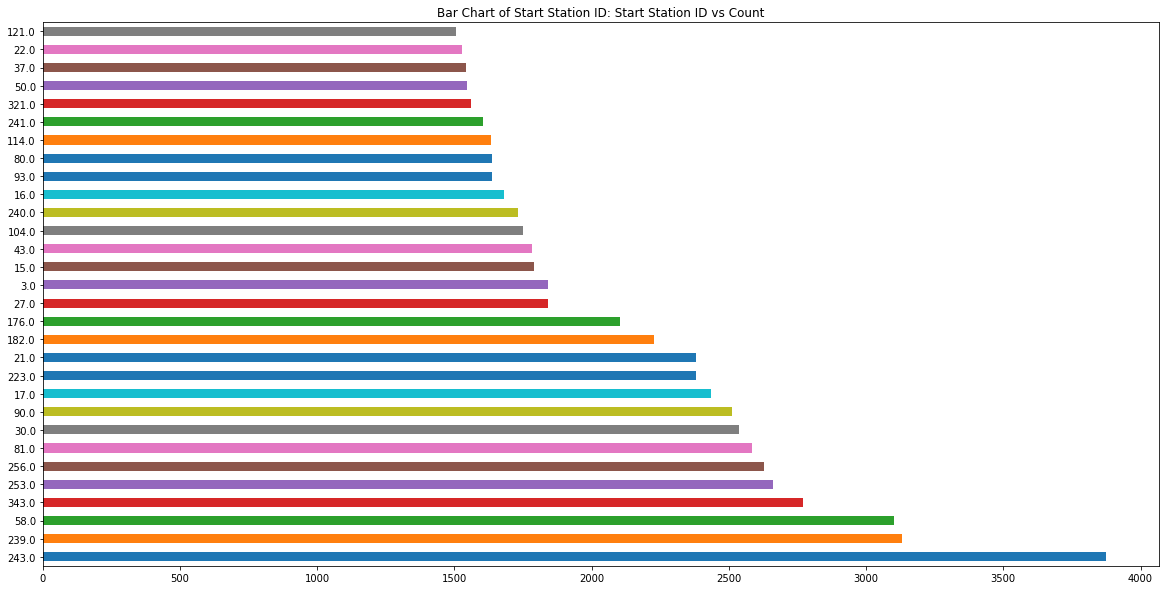

In [22]:
bike_rental_cut_duration_outliers['start_station_id'].value_counts().head(30).plot(kind='barh', figsize=(20,10))
plt.title('Bar Chart of Start Station ID: Start Station ID vs Count');

#### histogram of start time (hours)

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


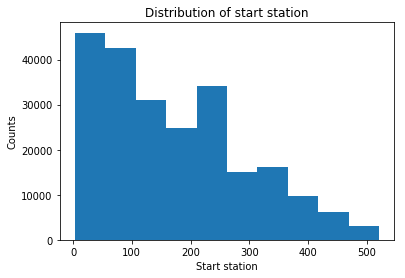

In [23]:
hour_bins = np.arange(0, 23+1, 1)
plt.hist(data=bike_rental_cut_duration_outliers, x='start_station_id', color=base_color)
plt.title('Distribution of start station')
plt.xlabel('Start station')
plt.ylabel('Counts');

This Distribution of start station histogram is highly skewed to the right. Therefore the visulation study creates good plot for showcasing the high density of distribution in starting station for short duration.

We observe that the start stations with small ID usually have short duration or rentals are for tiny little trips.


#### Violin plot (duration_sec against whether bike share for all trip)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


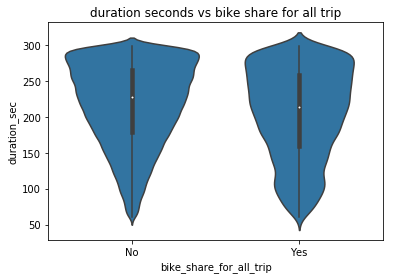

In [24]:
sns.violinplot(data=bike_rental_cut_duration_outliers, x='bike_share_for_all_trip', y='duration_sec', color=base_color)
plt.title('duration seconds vs bike share for all trip');

From the Violin plot, We observe that if bike is shared for all trip, the bike duration in second is usually distrbuted uniformly and if bike is not shared for all trip, the bike duration is often for trip with high duration in second.